### Dynamic Time Warping

In [2]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import itertools

In [4]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

In [5]:
from glob import glob

In [6]:
data_path = os.path.join(os.getcwd(),'..','data','SvobodaLabSSCData','CRCNS')

In [7]:
data = pd.read_csv(os.path.join(data_path, 'an197522_2013_03_08_session','relDf_3.csv'))

#### Calculate dissimilarity between trials based on the dynamic time warping between the time series for each cell

In [8]:
def calculateDTW(data):
    
    nonnan_keys = data.columns[np.sum(np.isnan(data))==0]
    data_trial = data[nonnan_keys].T.groupby(0)
    
    # creating the trial_dict
    trial_dict = {}
    for trial_key in data_trial.groups.keys():
        trial_dict[trial_key] = data[data_trial.groups[trial_key]][1:].T # removing the first row as it contains the trial ids
    
    # creating the direct product
    result = list(itertools.product(list(trial_dict.values()),list(trial_dict.values())))
    
    # creating the distance matrix
    D = []
    for pair in result:
        d = fastdtw(*map(np.array,pair),dist = euclidean)[0]
        D.append(d)
    D = np.array(D).reshape((np.sqrt(len(D)),np.sqrt(len(D))))
    return(D)

In [9]:
D = calculateDTW(data)

/home/val/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [10]:
dissimilarities = {}
for filename in sorted(glob(os.path.join(data_path, 'an197522_2013_03_08_session','rel*.csv'))):
    data = pd.read_csv(filename)
    dissimilarities['D_vol'+filename[-5]] = calculateDTW(data)

/home/val/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [28]:
L = []
for filename in sorted(glob(os.path.join(data_path, 'an197522_2013_03_08_session','trialTypes*.csv'))):
    labels = pd.read_csv(filename,header = None)
    L.append(labels)
print(L[0].iloc[0,:])
print(len(list(L[5].iloc[0,:])))

0     HitR
1     HitR
2     ErrL
3     HitR
4     HitL
5     HitR
6     HitL
7     HitR
8     HitR
9     HitL
10    HitR
11    HitL
12    HitL
13    HitL
14    ErrR
15    HitR
16    HitR
17    HitL
18    HitR
19    HitL
20    HitL
21    HitR
22    HitR
23    HitL
24    ErrR
25    ErrR
26    HitL
27    HitL
28    HitR
29    HitR
30    ErrR
31    HitL
32    HitL
33    HitR
34    ErrL
35    ErrR
36    ErrR
37    ErrR
38    ErrR
39    HitR
40    ErrR
41    ErrR
42    ErrR
43    ErrR
44    HitR
45     NaN
Name: 0, dtype: object
32


In [37]:
dissimilarities.keys()
dissimilarities['D_vol8'].shape

(28, 28)

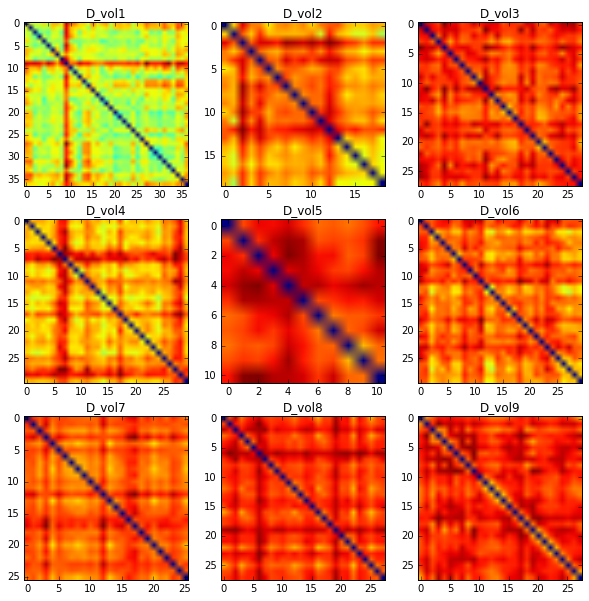

In [138]:
from collections import OrderedDict
D = OrderedDict(sorted(dissimilarities.items()))
#for key, value in dissimilarities.items():
#fig,axes = plt.subplots(3,3)
plt.figure(figsize = (10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    key, value = list(D.items())[i]
    plt.imshow(value)
    
    plt.title(key)



#### MDS

In [193]:
from sklearn import manifold

In [201]:
mds = manifold.MDS(n_components=2, dissimilarity="precomputed")
pos = mds.fit(D).embedding_

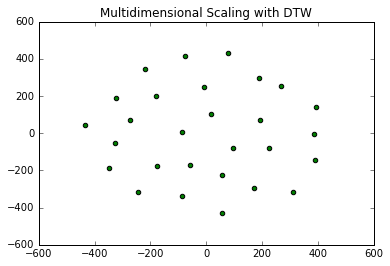

In [202]:
plt.scatter(pos[:, 0], pos[:, 1], c='g')
plt.title('Multidimensional Scaling with DTW')

### Hierarchical Clustering

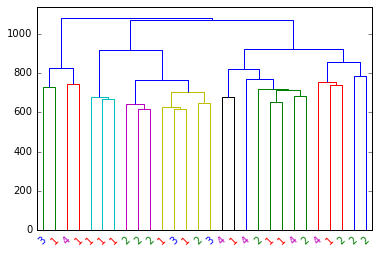

In [209]:
import scipy.cluster.hierarchy as sch
Y = sch.linkage(D, method='ward')

Z = sch.dendrogram(Y, orientation='top', labels = trialTypes)
label_colors = {'1': 'r', '2': 'g', '3': 'b', '4': 'm'}

ax = plt.gca()
xlbls = ax.get_xmajorticklabels()

for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])


IndexError: list index out of range

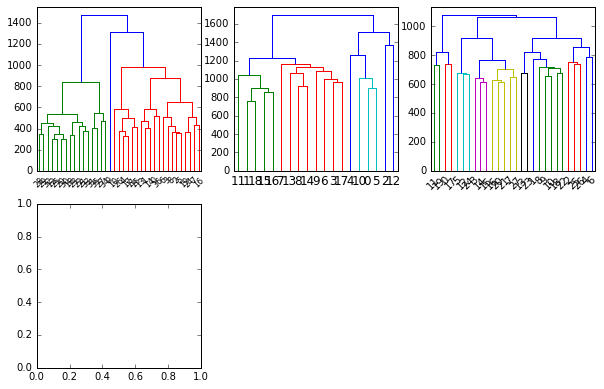

In [174]:
plt.figure(figsize = (10,10))
for i in range(9):
    
    plt.subplot(3,3,i+1)
    key, value = list(D.items())[i]

    Y = sch.linkage(np.array(value), method='ward')
    labels = list(L[i].iloc[0,:])
    del labels[-1]
    Z = sch.dendrogram(Y, orientation='top', labels = labels)
    Z = sch.dendrogram(Y, orientation='top')



    #label_colors = {'1': 'r', '2': 'g', '3': 'b', '4': 'm'}

    #ax = plt.gca()
    #xlbls = ax.get_xmajorticklabels()

    #for lbl in xlbls:
    #    lbl.set_color(label_colors[lbl.get_text()])
        
    

# Plot distance matrix.

    #index = Z['leaves']
    #D_ordered = D[index,:].copy()
    #D_ordered = D_ordered[:,index]
    #im = plt.matshow(D_ordered, aspect='auto', origin='lower')
    #plt.figure()
    #plt.imshow(D_ordered)





In [168]:
list(L[0].iloc[0,:])

['HitR',
 'HitR',
 'ErrL',
 'HitR',
 'HitL',
 'HitR',
 'HitL',
 'HitR',
 'HitR',
 'HitL',
 'HitR',
 'HitL',
 'HitL',
 'HitL',
 'ErrR',
 'HitR',
 'HitR',
 'HitL',
 'HitR',
 'HitL',
 'HitL',
 'HitR',
 'HitR',
 'HitL',
 'ErrR',
 'ErrR',
 'HitL',
 'HitL',
 'HitR',
 'HitR',
 'ErrR',
 'HitL',
 'HitL',
 'HitR',
 'ErrL',
 'ErrR',
 'ErrR',
 'ErrR',
 'ErrR',
 'HitR',
 'ErrR',
 'ErrR',
 'ErrR',
 'ErrR',
 'HitR',
 nan]

In [206]:
 trialTypes = [4,4,4,2,2,1,2,2,2,1,1,3,1,4,2,2,1,1,4,1,3,1,2,1,1,1,2,3]

In [76]:
type(D)

numpy.ndarray

In [79]:
len(trialTypes)

27

In [80]:
(D).shape

(28, 28)